# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress


# Import custom function 
from functions import run_linear_regression

# Import API keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create a variable for the Output File (CSV)
imp_output_data_file = "Output/City_Data_Farenheit.csv"

# Create a variable for the Output File (CSV)
met_output_data_file = "Output/City_Data_Celsius.csv"

# Define the Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# Create lists for latitudes/longitudes and cities 
my_lat_lngs = []
my_cities = []

# Create a set of random latitude and longitude combinations
my_lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
my_lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
my_lat_lngs = zip(my_lats, my_lngs)


# Identify nearest city for each latitude, longitude combination
for lat_lng in my_lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in my_cities:
        my_cities.append(city)

# Print the city count to confirm sufficient count
print(len(my_cities))

   

631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define the variables to be used in the request query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Create the Lists to be used in the Dictionary for the Data Frame
imp_city = []
imp_cloudiness = []
imp_country = []
imp_date = []
imp_humidity = []
imp_lat = []
imp_lng = []
imp_maxtemp = []
imp_windspeed = []



counter = 0


# Loop through the entire list of cities and request data for each city

# for city in my_cities:
for city in my_cities:
    try:
        imp_response = requests.get(query_url + city).json()
        imp_city.append(imp_response['name'])
        imp_cloudiness.append(imp_response['clouds']['all'])
        imp_country.append(imp_response['sys']['country'])
        imp_date.append(imp_response['dt'])
        imp_humidity.append(imp_response['main']['humidity'])
        imp_lat.append(imp_response['coord']['lat'])
        imp_lng.append(imp_response['coord']['lon'])
        imp_maxtemp.append(imp_response['main']['temp_max'])
        imp_windspeed.append(imp_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")


        
print("------------------------------\nData Retrieval Complete\n------------------------------")
print()
print()
print(imp_response.keys())



Processing Request 1 | kupang
Processing Request 2 | sao filipe
Processing Request 3 | hilo
Processing Request 4 | letka
City not found -- Skipping: karkaralinsk
Processing Request 5 | aranda de duero
Processing Request 6 | balkhash
Processing Request 7 | cape town
City not found -- Skipping: saleaula
Processing Request 8 | kostomuksha
Processing Request 9 | yellowknife
Processing Request 10 | tateyama
Processing Request 11 | pokosnoye
Processing Request 12 | kargasok
Processing Request 13 | puerto escondido
Processing Request 14 | barrow
Processing Request 15 | half moon bay
Processing Request 16 | thompson
Processing Request 17 | tautira
Processing Request 18 | mataura
Processing Request 19 | ushuaia
Processing Request 20 | lengshuitan
Processing Request 21 | sao joao da barra
Processing Request 22 | hailun
Processing Request 23 | kruisfontein
Processing Request 24 | geraldton
Processing Request 25 | klaksvik
Processing Request 26 | san patricio
Processing Request 27 | katsuura
Proce

Processing Request 223 | savonlinna
City not found -- Skipping: kamenskoye
Processing Request 224 | haines junction
Processing Request 225 | kuching
Processing Request 226 | yerbogachen
Processing Request 227 | juneau
Processing Request 228 | pallasovka
Processing Request 229 | salvador
Processing Request 230 | roma
Processing Request 231 | tongliao
City not found -- Skipping: kegalla
Processing Request 232 | markova
Processing Request 233 | pathein
Processing Request 234 | aswan
Processing Request 235 | provideniya
Processing Request 236 | chuy
Processing Request 237 | redlands
Processing Request 238 | roros
City not found -- Skipping: labutta
Processing Request 239 | terrace
Processing Request 240 | hobyo
Processing Request 241 | andros town
Processing Request 242 | bayonet point
Processing Request 243 | hays
Processing Request 244 | tbilisskaya
Processing Request 245 | kieta
Processing Request 246 | show low
Processing Request 247 | tokur
Processing Request 248 | araouane
Processing

Processing Request 436 | te anau
Processing Request 437 | pelym
Processing Request 438 | visby
Processing Request 439 | ibra
Processing Request 440 | lebyazhye
Processing Request 441 | churachandpur
Processing Request 442 | tisul
Processing Request 443 | darnah
Processing Request 444 | salt
City not found -- Skipping: artyk
Processing Request 445 | evensk
Processing Request 446 | manjeshwar
Processing Request 447 | scarborough
City not found -- Skipping: skalistyy
Processing Request 448 | omsukchan
Processing Request 449 | mossendjo
Processing Request 450 | vila velha
Processing Request 451 | leh
Processing Request 452 | kayes
Processing Request 453 | husavik
Processing Request 454 | nchelenge
Processing Request 455 | tamiahua
City not found -- Skipping: longlac
Processing Request 456 | itaituba
Processing Request 457 | lara
Processing Request 458 | korla
Processing Request 459 | imbituba
Processing Request 460 | road town
Processing Request 461 | borborema
Processing Request 462 | bil

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the dictionary to be used in the DataFrame
my_imp_weather_dictionary ={
    "City": imp_city, 
    "Cloudiness":imp_cloudiness, 
    "Country":imp_country, 
    "Date":imp_date, 
    "Humidity":imp_humidity,
    "Lat":imp_lat,
    "Lng":imp_lng,
    "Max Temp":imp_maxtemp,
    "Wind Speed":imp_windspeed
}

# Create a DataFrame from the Dictionary created above
my_imp_weather_dataframe = pd.DataFrame(my_imp_weather_dictionary)

# Exports the Data Frame to an Output File 
my_imp_weather_dataframe.to_csv(imp_output_data_file, index=False, header=True)


In [5]:
# Display the first 20 rows of the DatafRame
my_imp_weather_dataframe.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kupang,20,ID,1584113216,100,-10.17,123.58,75.20,1.12
1,São Filipe,0,CV,1584112915,54,14.90,-24.50,77.63,15.23
2,Hilo,1,US,1584113198,82,19.73,-155.09,68.00,3.36
3,Letka,97,RU,1584113385,84,59.60,49.42,34.43,9.91
4,Aranda de Duero,84,ES,1584113387,57,41.67,-3.69,61.25,7.20
5,Balkhash,45,KZ,1584113255,88,46.84,74.98,24.53,3.71
6,Cape Town,0,ZA,1584112992,53,-33.93,18.42,75.99,14.99
7,Kostomuksha,98,RU,1584113394,91,64.57,30.58,25.07,13.47
8,Yellowknife,20,CA,1584113396,74,62.46,-114.35,-18.00,5.82
9,Tateyama,0,JP,1584113398,58,34.98,139.87,57.20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

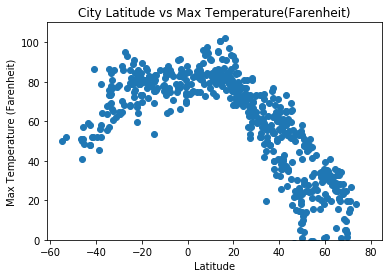

In [6]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values   
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Max Temperature(Farenheit)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()



#### Latitude vs. Humidity Plot

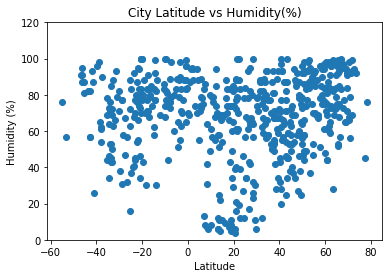

In [7]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 120)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Humidity(%)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


#### Latitude vs. Cloudiness Plot

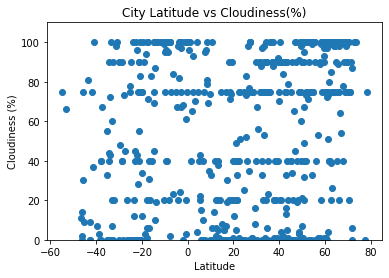

In [8]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Cloudiness(%)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


#### Latitude vs. Wind Speed Plot

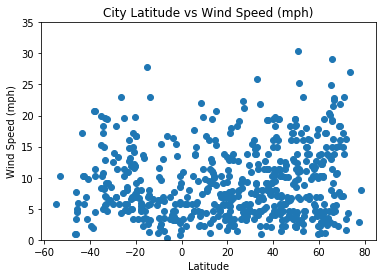

In [9]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values 
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 35)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Wind Speed (mph)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# The function has been created and saved in a file called functions.py 
# This is referenced at the beginning of the jupyter notebook


In [10]:
# Create Northern and Southern Hemisphere DataFrames
my_imp_northern_hemisphere_df = my_imp_weather_dataframe.loc[my_imp_weather_dataframe["Lat"] > 0] 
my_imp_southern_hemisphere_df = my_imp_weather_dataframe.loc[my_imp_weather_dataframe["Lat"] < 0] 

print("===========================================================================================")
print(" NORTHERN HEMISPHERE DATAFRAME HEADER")
print("===========================================================================================")
print()
print()
print(my_imp_northern_hemisphere_df.head())
print()
print()
print(f"The number of cities retrieved for the northern hemisphere = {len(my_imp_northern_hemisphere_df)}")
print()
print()

print()
print()
print("===========================================================================================")
print(" SOUTHERN HEMISPHERE DATAFRAME HEADER")
print("===========================================================================================")
print()
print()
print(my_imp_southern_hemisphere_df.head())
print()
print()
print(f"The number of cities retrieved for the southern hemisphere = {len(my_imp_southern_hemisphere_df)}")
print()



 NORTHERN HEMISPHERE DATAFRAME HEADER


              City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1       São Filipe           0      CV  1584112915        54  14.90  -24.50   
2             Hilo           1      US  1584113198        82  19.73 -155.09   
3            Letka          97      RU  1584113385        84  59.60   49.42   
4  Aranda de Duero          84      ES  1584113387        57  41.67   -3.69   
5         Balkhash          45      KZ  1584113255        88  46.84   74.98   

   Max Temp  Wind Speed  
1     77.63       15.23  
2     68.00        3.36  
3     34.43        9.91  
4     61.25        7.20  
5     24.53        3.71  


The number of cities retrieved for the northern hemisphere = 411




 SOUTHERN HEMISPHERE DATAFRAME HEADER


         City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0      Kupang          20      ID  1584113216       100 -10.17  123.58   
6   Cape Town           0      ZA  1584112992        53 -33.93   18.42

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = -1.36 times Latitude + 102.07
The Correlation (R) between Latitude and the Max Temperature is: -0.87
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.7569


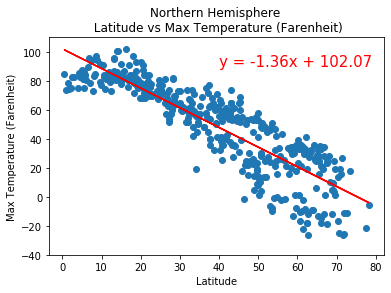

In [11]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-40, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Max Temperature (Farenheit)")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_temp_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_temp_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_temp_lat["line_eq"],(40,90),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_NH_temp_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_temp_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_NH_temp_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_NH_temp_lat["rvalue"]),2) * round((my_LR_dict_NH_temp_lat["rvalue"]),2),4) )) 


#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()


In [24]:
## Relationship between Latitude & Temperature:
## As can be seen from the graph above, at the time of running this analysis:
## There was a strong negative correlation of -0.87 between Latitude and Temperature in the Northern Hemisphere.
## The Linear Regression Line Equation was Temperature = -1.36 times Latitude + 102.07
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.52 times Latitude + 85.58
The Correlation (R) between Latitude and the Max Temperature is: 0.6
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.36


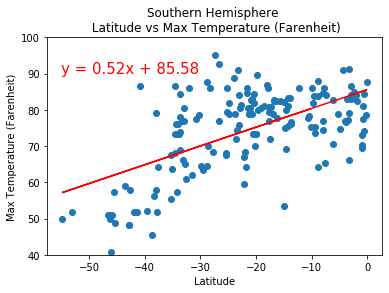

In [12]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(40, 100)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Max Temperature (Farenheit)")


#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_temp_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_temp_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_temp_lat["line_eq"],(-55,90),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_SH_temp_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_temp_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_SH_temp_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_SH_temp_lat["rvalue"]),2) * round((my_LR_dict_SH_temp_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()


In [25]:
## Relationship between Latitude & Temperature:
## As can be seen from the graph above, at the time of running this analysis:
## There was a strong positive correlation of 0.60 between Latitude and Temperature in the Southern Hemisphere.
## The Linear Regression Line Equation was Temperature = 0.52 times Latitude + 85.58


In [ ]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.43 times Latitude + 50.24
The Correlation (R) between Latitude and the Max Temperature is: 0.35
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.1225


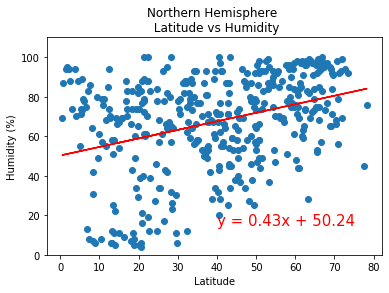

In [15]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Humidity")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_humidity_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_humidity_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_humidity_lat["line_eq"],(40,15),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_NH_humidity_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_humidity_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_NH_humidity_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_NH_humidity_lat["rvalue"]),2) * round((my_LR_dict_NH_humidity_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


In [26]:
## Relationship between Latitude & Humidity:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of 0.35 between Latitude and Humidity in the Northern Hemisphere.
## The Linear Regression Line Equation was Humidity = 0.43 times Latitude + 50.24


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.28 times Latitude + 78.56
The Correlation (R) between Latitude and the Max Temperature is: 0.2
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.04


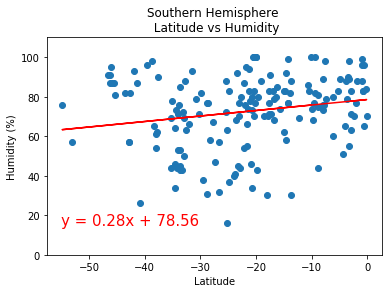

In [17]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Humidity")


#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_humidity_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_humidity_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_humidity_lat["line_eq"],(-55,15),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_SH_humidity_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_humidity_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_SH_humidity_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_SH_humidity_lat["rvalue"]),2) * round((my_LR_dict_SH_humidity_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


In [27]:
## Relationship between Latitude & Humidity:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of 0.2 between Latitude and Humidity in the Southern Hemisphere.
## The Linear Regression Line Equation was Humidity = 0.28 times Latitude + 78.56


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Regression Line equation is: Cloudiness = 0.73 times Latitude + 21.14
The Correlation (R) between Latitude and Cloudiness is: 0.36
The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is 0.1296


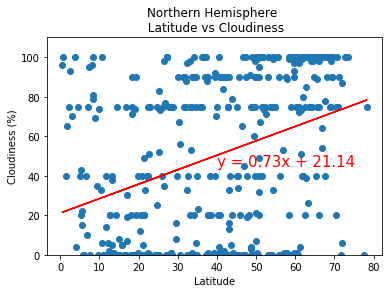

In [19]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Cloudiness")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_cloudiness_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_cloudiness_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_cloudiness_lat["line_eq"],(40,45),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Cloudiness = " + str(round((my_LR_dict_NH_cloudiness_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_cloudiness_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Cloudiness is: " + str(round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is " + str( round( round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2) * round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
## Relationship between Latitude & Cloudiness:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of 0.36 between Latitude and Cloudiness in the Northern Hemisphere.
## The Linear Regression Line Equation was Cloudiness = 0.73 times Latitude + 21.14


The Regression Line equation is: Cloudiness = 1.11 times Latitude + 75.91
The Correlation (R) between Latitude and Cloudiness is: 0.38
The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is 0.1444


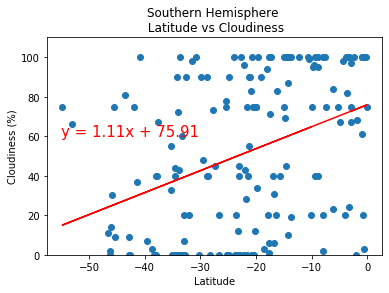

In [20]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Cloudiness")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_cloudiness_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_cloudiness_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_cloudiness_lat["line_eq"],(-55, 60),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Cloudiness = " + str(round((my_LR_dict_SH_cloudiness_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_cloudiness_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Cloudiness is: " + str(round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is " + str( round( round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2) * round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


In [29]:
## Relationship between Latitude & Cloudiness:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of 0.38 between Latitude and Cloudiness in the Southern Hemisphere.
## The Linear Regression Line Equation was Cloudiness = 1.11 times Latitude + 75.91


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Regression Line equation is: Wind Speed = 0.06 times Latitude + 7.12
The Correlation (R) between Latitude and Wind Speed is: 0.19
The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is 0.0361


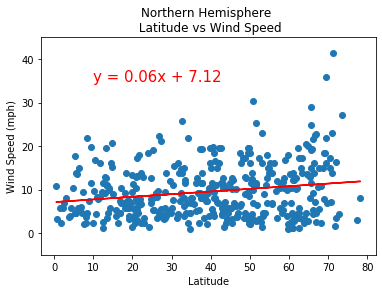

In [21]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-5, 45)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Wind Speed")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_windspeed_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_windspeed_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_windspeed_lat["line_eq"],(10,35),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Wind Speed = " + str(round((my_LR_dict_NH_windspeed_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_windspeed_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Wind Speed is: " + str(round((my_LR_dict_NH_windspeed_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is " + str( round( round((my_LR_dict_NH_windspeed_lat["rvalue"]),2) * round((my_LR_dict_NH_windspeed_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()


In [30]:
## Relationship between Latitude & Wind-Speed:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of 0.19 between Latitude and Wind-Speed in the Northern Hemisphere.
## The Linear Regression Line Equation was Wind-Speed = 0.06 times Latitude + 7.12


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Regression Line equation is: Wind Speed = -0.07 times Latitude + 6.93
The Correlation (R) between Latitude and Wind Speed is: -0.18
The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is 0.0324


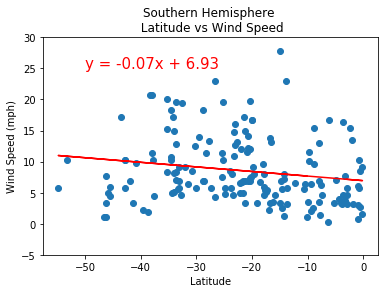

In [23]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-5, 30)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Wind Speed")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_windspeed_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_windspeed_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_windspeed_lat["line_eq"],(-50,25),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Wind Speed = " + str(round((my_LR_dict_SH_windspeed_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_windspeed_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Wind Speed is: " + str(round((my_LR_dict_SH_windspeed_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is " + str( round( round((my_LR_dict_SH_windspeed_lat["rvalue"]),2) * round((my_LR_dict_SH_windspeed_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()


In [31]:
## Relationship between Latitude & Wind-Speed:
## As can be seen from the graph above, at the time of running this analysis:
## There was a very low correlation of -0.18 between Latitude and Wind-Speed in the Southern Hemisphere.
## The Linear Regression Line Equation was Wind-Speed = -0.07 times Latitude + 6.93
